In [ ]:
# 학습용 데이터셋
import pandas as pd

train = pd.read_csv("train.csv")

print(type(train))
train

<class 'pandas.core.frame.DataFrame'>


,height (cm),weight(kg)
0,143.8,41.5
1,138.3,30.4
2,154.2,49.1
3,118.1,17.9
4,187.2,94.5
...,...,...
81918,179.0,85.4
81919,161.7,54.5
81920,136.1,27.4
81921,176.1,82.0


In [ ]:
height = train['height (cm)']
weight = train['weight(kg)']

print(type(height))
print(type(weight))

print(height.shape)
print(weight.shape)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(81923,)
(81923,)


In [ ]:
height = height.to_numpy()
weight = weight.to_numpy()

height = height.reshape(81923,1)
weight = weight.reshape(81923,1)

print(height.shape)
print(weight.shape)

(81923, 1)
(81923, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(height, weight, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(61442, 1) (61442, 1)
(20481, 1) (20481, 1)


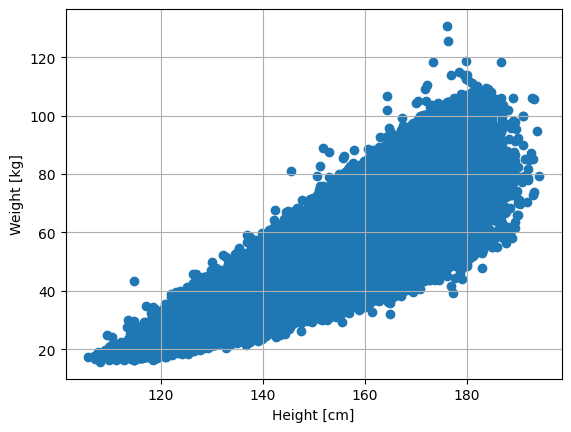

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(x_train, y_train)
plt.xlabel("Height [cm]")
plt.ylabel("Weight [kg]")
plt.grid() # 격자
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train) # 학습용 데이터 세트를 이용해서, lr을 모델을 학습

LinearRegression()

In [ ]:
print("학습 데이터셋 :", lr.score(x_train, y_train))
print("시험 데이터셋 :", lr.score(x_test, y_test))

학습 데이터셋 : 0.7152077812335236
시험 데이터셋 : 0.7162096703017845


In [ ]:
import csv

f = open("test.csv", "r")
data = csv.reader(f)

print(type(data))

h = next(data)
print(h)

test_height = []

#i=0
for row in data:
    #print(i, row)
    #i=i+1

    #if (row[0] == "height (cm)"):
    test_height.append(float(row[0])) # float()하기 전에는 문자열
    #test_height.append(row[0])

f.close()

<class '_csv.reader'>
['height (cm)']


In [ ]:
print(test_height[0])
print(test_height[1])

print(type(test_height))
print(test_height)
len(test_height)

163.4
124.6
<class 'list'>
[163.4, 124.6, 174.9, 150.8, 135.1, 128.6, 136.7, 165.5, 162.5, 159.4, 167.8, 168.6, 162.0, 143.6, 167.5, 155.1, 117.5, 142.9, 125.1, 140.0, 181.4, 137.9, 141.9, 127.5, 139.9, 128.7, 162.1, 161.6, 137.4, 123.8, 166.0, 171.6, 148.3, 169.6, 150.0, 157.0, 177.0, 124.8, 168.8, 124.2, 149.4, 163.0, 166.8, 130.3, 150.6, 159.2, 123.9, 127.4, 169.2, 149.0, 176.0, 151.0, 161.1, 135.9, 159.2, 122.7, 140.3, 162.3, 151.1, 139.4, 126.0, 155.5, 168.0, 153.5, 168.0, 138.0, 169.9, 158.0, 158.2, 159.4, 177.9, 161.2, 130.1, 121.8, 159.6, 146.2, 134.7, 161.0, 171.3, 134.4, 135.9, 135.0, 158.4, 174.0, 145.0, 165.8, 150.8, 153.0, 174.3, 152.0, 157.4, 132.7, 166.4, 144.0, 151.0, 119.6, 170.3, 173.6, 150.6, 166.2, 178.5, 169.6, 159.3, 120.2, 160.0, 161.0, 170.3, 167.7, 124.7, 131.3, 162.5, 174.4, 167.9, 159.8, 154.8, 151.0, 175.5, 172.1, 158.0, 127.9, 162.2, 167.8, 168.0, 158.3, 159.1, 123.1, 143.9, 144.1, 128.1, 171.5, 154.8, 126.9, 172.5, 137.3, 128.6, 165.0, 172.5, 171.1, 157.7,

20481

In [ ]:
import numpy as np

#test_height = test_height.to_numpy()
#len(test_height.shape)

test_height = np.array(test_height).reshape(-1, 1)

print(test_height.shape)
print(type(test_height))

(20481, 1)
<class 'numpy.ndarray'>


In [ ]:
y_pred = []

y_pred.append(lr.predict(test_height))
#for row in test_height:
  #print(lr.predict(row))
  #y_pred.append(row)
print(y_pred)

[array([[58.71445497],
       [24.96890134],
       [68.71635876],
       ...,
       [59.84510497],
       [50.10412041],
       [64.45467802]])]


In [ ]:
print(type(y_pred))

y_pred = np.array(y_pred).reshape(-1, 1)

print(y_pred.shape)
print(y_pred)

<class 'list'>
(20481, 1)
[[58.71445497]
 [24.96890134]
 [68.71635876]
 ...
 [59.84510497]
 [50.10412041]
 [64.45467802]]


In [ ]:
print(lr.score(test_height, y_pred))

1.0


In [ ]:
print(y_pred[0])
print(y_pred[1])

[58.71445497]
[24.96890134]


In [ ]:
submission = pd.read_csv('submission.csv')

# 'class' 열을 y_pred 값으로 업데이트
submission['weight(kg)'] = y_pred

# 업데이트된 데이터프레임을 'submission.csv' 파일로 저장 (기존 파일 덮어쓰기)
submission.to_csv('submission(20211689).csv', index=False)

In [ ]:
from sklearn.metrics import mean_absolute_error # MAE(평균 절대 오차)

y_test_pred = lr.predict(x_test) # 예측값 얻어냄!

mae = mean_absolute_error(y_test_pred, y_pred) # sum(|정답 - 예측값|) / N

print(mae)

16.717519622744426
